# White box model - Linear Regression

In [35]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X,y = diabetes['data'], diabetes['target']

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
type(diabetes)

sklearn.utils.Bunch

In [37]:
print(diabetes.data.shape)
print("feature_names", diabetes.feature_names)

(442, 10)
feature_names ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [38]:
feature_rename = { 'age':'Age',
                   'sex' : 'Sex',
                   'bmi': 'BMI',
                   'bp': 'BP',
                   's1': 'Total Cholestrol',
                   's2' : 'LDL',
                   's3' : 'HDL',
                   's4' : 'Thyroid',
                   's5' : 'Glaucoma',
                   's6' : 'Glucose'}

In [39]:
df = pd.DataFrame(X,columns=diabetes['feature_names'])
df.rename(columns = feature_rename, inplace=True)

# Dataset

In [40]:
df.head()

,Age,Sex,BMI,BP,Total Cholestrol,LDL,HDL,Thyroid,Glaucoma,Glucose
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [41]:
df['Target-Diabetes'] = y

In [42]:
df.head()

,Age,Sex,BMI,BP,Total Cholestrol,LDL,HDL,Thyroid,Glaucoma,Glucose,Target-Diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


# EDA - Exploratory Data Analysis

In [43]:
# Correlation b/w features and each feature w.r.t target

# Pearson coefficient
corr = df.corr()

# Print values of coefficients
corr

,Age,Sex,BMI,BP,Total Cholestrol,LDL,HDL,Thyroid,Glaucoma,Glucose,Target-Diabetes
Age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
Sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
BP,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
Total Cholestrol,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
LDL,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
HDL,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
Thyroid,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
Glaucoma,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
Glucose,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


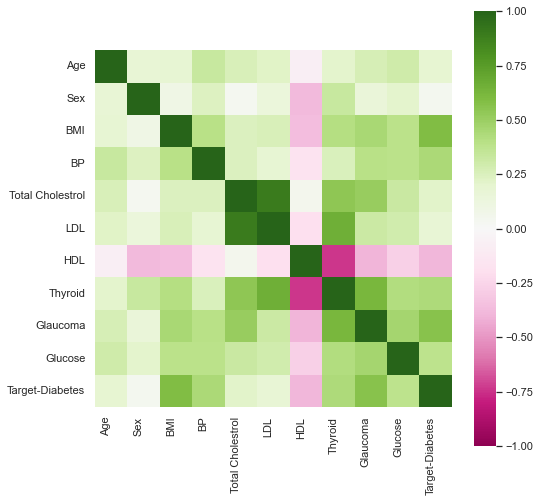

In [44]:
# Plot these values on heatmap

sns.set(style = 'whitegrid')
sns.set_palette('bright')

f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr,
            vmin=-1, vmax=1, center=0,
            cmap='PiYG',
            square=True,
            ax=ax)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right');

# Modelling - Linear Regression

In [45]:
# Training linear Regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate
lr_model = LinearRegression()
# Fit - learn weights of model by fitting on train set
lr_model.fit(X_train, y_train)
# Predict
y_pred = lr_model.predict(X_test)
# Evaluate
mae = np.mean(np.abs(y_test - y_pred))
print(mae)

42.79389304196525




# Feature Importance (by design Interpretable)
# XAI -> White-box



In [46]:
# View learned weights / coefficients of model
# In regression context, the slope is the heart and soul of the equation because it tells you
# how much you can expect Y to change as X increases i.e. estimate an avg rate of change

weights = lr_model.coef_
print(weights)

[  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]


In [47]:
# Feature Importance plot

sns.set(style = 'whitegrid')
sns.set_palette('bright')

weights = lr_model.coef_

In [48]:
# Important feature index
feature_importance_idx = np.argsort(np.abs(weights))[::-1]
print(feature_importance_idx)

[4 8 2 5 3 7 1 6 9 0]


In [49]:
# Important feature names
feature_importance_names = [df.columns[idx].upper() for idx in feature_importance_idx]
feature_importance_names

['TOTAL CHOLESTROL',
 'GLAUCOMA',
 'BMI',
 'LDL',
 'BP',
 'THYROID',
 'SEX',
 'HDL',
 'GLUCOSE',
 'AGE']

In [50]:
# Important feature values/weights
feature_importance_values = [weights[idx] for idx in feature_importance_idx]
feature_importance_values

[-931.461260931396,
 736.1890983908113,
 542.4257534189239,
 518.0440554737884,
 347.7083052922803,
 275.31003836682294,
 -241.96624835284481,
 163.40353476472802,
 48.671124882801365,
 37.90031425824673]

Text(0, 0.5, 'Features')

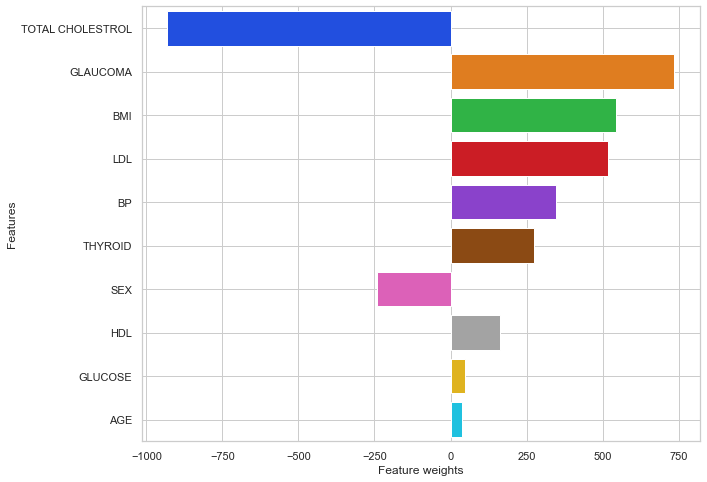

In [51]:
# Now plot feature names with weights / values / coeficients - DESCENDING ORDER

f,ax = plt.subplots(figsize=(10,8))
sns.barplot(x=feature_importance_values, y=feature_importance_names, ax=ax)
ax.grid(True)
ax.set_xlabel('Feature weights')
ax.set_ylabel('Features')